In [1376]:
#Import libraries

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.express as px
import os

In [1377]:
# Read in data
prc_data_csv = Path("../data/raw data/PRC Data Breach Chronology - 1.13.20 (1).csv")
prc_data = pd.read_csv(prc_data_csv, infer_datetime_format=True, parse_dates=True,)
prc_data = prc_data.sort_index()
prc_data.head(15)

,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach,Latitude,Longitude,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,3/3/2006,PayDay OK LLC,NaN,New Jersey,HACK,BSF,88,The company's website was breached sometime ar...,California Attorney General,https://oag.ca.gov/,2006,40.058324,-74.405661,NaN,NaN,NaN
1,1/4/2012,"SF Fire Credit Union, Pacifica-Coastside Credi...",San Francisco,California,PORT,BSF,0,"The December 29, 2011 theft of a laptop from a...",California Attorney General,NaN,2012,37.774930,-122.419416,NaN,NaN,NaN
2,2/18/2012,"BDO USA, Rubio's Restaurants, Inc.",San Diego,California,PORT,BSR,0,BDO was contracted by Rubio's to perform finan...,California Attorney General,NaN,2012,32.715329,-117.157255,NaN,NaN,NaN
3,2/22/2012,"DHI Mortgage Company, Ltd.",Austin,Texas,HACK,BSF,0,"On February 10, 2012, DHI Mortgage became awar...",California Attorney General,NaN,2012,30.267153,-97.743061,NaN,NaN,NaN
4,3/12/2012,"Impairment Resources, LLC",San Diego,California,PORT,MED,"14,000",An office burglary on New Year's Eve 2011 resu...,California Attorney General,NaN,2012,32.715329,-117.157255,NaN,NaN,NaN
5,3/14/2012,"RJL Insurance Services, LLC, RJL Wealth Manage...",San Diego,California,DISC,BSF,0,RJL Insurance Services became aware of a vulne...,California Attorney General,NaN,2012,32.715329,-117.157255,NaN,NaN,NaN
6,3/19/2012,Kaiser Foundation Health Plan,Oakland,California,DISC,MED,"30,000",Someone purchased a hard drive in September of...,California Attorney General,NaN,2012,37.804364,-122.271114,NaN,NaN,NaN
7,3/19/2012,"IndyMac Bank, IndyMac Resources, Inc.",Dallas,Texas,DISC,BSF,0,A security company searching the web for sensi...,California Attorney General,NaN,2012,32.802955,-96.769923,NaN,NaN,NaN
8,3/23/2012,Manhattan Prep,New York,New York,HACK,BSR,0,"A hacker was able to access the names, mailing...",California Attorney General,NaN,2012,40.714353,-74.005973,NaN,NaN,NaN
9,3/31/2012,St. Joseph's Medical Center,Stockton,California,PHYS,MED,712,A storeroom window at Saint Joseph's HealthCar...,California Attorney General,NaN,2012,37.957702,-121.290780,NaN,NaN,NaN


In [1378]:
#Check Types of breach
prc_data["Type of breach"].value_counts()

HACK    2533
DISC    1861
PHYS    1733
PORT    1172
UNKN     704
INSD     606
STAT     249
CARD      68
Name: Type of breach, dtype: int64

In [1379]:
# Check Duplicates
prc_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9010    False
9011    False
9012    False
9013    False
9014    False
Length: 9015, dtype: bool

In [1380]:
# Check column names
prc_data.columns

Index(['Date Made Public', 'Company', 'City', 'State', 'Type of breach',
       'Type of organization', 'Total Records', 'Description of incident',
       'Information Source', 'Source URL', 'Year of Breach', 'Latitude',
       'Longitude', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [1381]:
#Drop unrelated Columns
prc_data = prc_data.drop(columns=["Latitude", "Longitude", "Unnamed: 13", "Unnamed: 14", "Unnamed: 15"])
prc_data.head(10)

,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach
0,3/3/2006,PayDay OK LLC,NaN,New Jersey,HACK,BSF,88,The company's website was breached sometime ar...,California Attorney General,https://oag.ca.gov/,2006
1,1/4/2012,"SF Fire Credit Union, Pacifica-Coastside Credi...",San Francisco,California,PORT,BSF,0,"The December 29, 2011 theft of a laptop from a...",California Attorney General,NaN,2012
2,2/18/2012,"BDO USA, Rubio's Restaurants, Inc.",San Diego,California,PORT,BSR,0,BDO was contracted by Rubio's to perform finan...,California Attorney General,NaN,2012
3,2/22/2012,"DHI Mortgage Company, Ltd.",Austin,Texas,HACK,BSF,0,"On February 10, 2012, DHI Mortgage became awar...",California Attorney General,NaN,2012
4,3/12/2012,"Impairment Resources, LLC",San Diego,California,PORT,MED,"14,000",An office burglary on New Year's Eve 2011 resu...,California Attorney General,NaN,2012
5,3/14/2012,"RJL Insurance Services, LLC, RJL Wealth Manage...",San Diego,California,DISC,BSF,0,RJL Insurance Services became aware of a vulne...,California Attorney General,NaN,2012
6,3/19/2012,Kaiser Foundation Health Plan,Oakland,California,DISC,MED,"30,000",Someone purchased a hard drive in September of...,California Attorney General,NaN,2012
7,3/19/2012,"IndyMac Bank, IndyMac Resources, Inc.",Dallas,Texas,DISC,BSF,0,A security company searching the web for sensi...,California Attorney General,NaN,2012
8,3/23/2012,Manhattan Prep,New York,New York,HACK,BSR,0,"A hacker was able to access the names, mailing...",California Attorney General,NaN,2012
9,3/31/2012,St. Joseph's Medical Center,Stockton,California,PHYS,MED,712,A storeroom window at Saint Joseph's HealthCar...,California Attorney General,NaN,2012


In [1382]:
# Drop useless columns
prc_data = prc_data.drop(columns=["Source URL"])
prc_data

,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Year of Breach
0,3/3/2006,PayDay OK LLC,NaN,New Jersey,HACK,BSF,88,The company's website was breached sometime ar...,California Attorney General,2006
1,1/4/2012,"SF Fire Credit Union, Pacifica-Coastside Credi...",San Francisco,California,PORT,BSF,0,"The December 29, 2011 theft of a laptop from a...",California Attorney General,2012
2,2/18/2012,"BDO USA, Rubio's Restaurants, Inc.",San Diego,California,PORT,BSR,0,BDO was contracted by Rubio's to perform finan...,California Attorney General,2012
3,2/22/2012,"DHI Mortgage Company, Ltd.",Austin,Texas,HACK,BSF,0,"On February 10, 2012, DHI Mortgage became awar...",California Attorney General,2012
4,3/12/2012,"Impairment Resources, LLC",San Diego,California,PORT,MED,"14,000",An office burglary on New Year's Eve 2011 resu...,California Attorney General,2012
...,...,...,...,...,...,...,...,...,...,...
9010,11/20/2009,"Mark D. Lurie, MD",NaN,CA,PHYS,MED,5166,Location of breached information: Theft\r\nBus...,US Department of Health and Human Services,2009
9011,11/17/2009,Health Services for Children with Special Need...,NaN,DC,PHYS,MED,3800,Location of breached information: Loss\r\nBusi...,US Department of Health and Human Services,2009
9012,10/30/2009,Alaska Department of Health and Social Services,NaN,AK,PHYS,MED,501,Location of breached information: Theft\r\nBus...,US Department of Health and Human Services,2009
9013,10/28/2009,"Mid America Kidney Stone Association, LLC",NaN,MO,PHYS,MED,1000,Location of breached information: Theft\r\nBus...,US Department of Health and Human Services,2009


In [1383]:
# Rename Columns
prc_data = prc_data.rename(columns={
    "Description of incident": "Description of Incident",
    "Type of breach": "Type of Breach",
    "Type of organization": "Type of Organization",
    "Company": "Company Name"
})
prc_data.head()

,Date Made Public,Company Name,City,State,Type of Breach,Type of Organization,Total Records,Description of Incident,Information Source,Year of Breach
0,3/3/2006,PayDay OK LLC,NaN,New Jersey,HACK,BSF,88,The company's website was breached sometime ar...,California Attorney General,2006
1,1/4/2012,"SF Fire Credit Union, Pacifica-Coastside Credi...",San Francisco,California,PORT,BSF,0,"The December 29, 2011 theft of a laptop from a...",California Attorney General,2012
2,2/18/2012,"BDO USA, Rubio's Restaurants, Inc.",San Diego,California,PORT,BSR,0,BDO was contracted by Rubio's to perform finan...,California Attorney General,2012
3,2/22/2012,"DHI Mortgage Company, Ltd.",Austin,Texas,HACK,BSF,0,"On February 10, 2012, DHI Mortgage became awar...",California Attorney General,2012
4,3/12/2012,"Impairment Resources, LLC",San Diego,California,PORT,MED,"14,000",An office burglary on New Year's Eve 2011 resu...,California Attorney General,2012


In [1384]:
#Drop Nulls
prc_data = prc_data.dropna()

In [1385]:
# Check for nulls
prc_data.isnull().sum()

Date Made Public           0
Company Name               0
City                       0
State                      0
Type of Breach             0
Type of Organization       0
Total Records              0
Description of Incident    0
Information Source         0
Year of Breach             0
dtype: int64

In [1386]:
# Check counts of years
prc_data.value_counts('Year of Breach')

Year of Breach
2012    659
2010    605
2013    605
2011    569
2016    484
2006    475
2007    448
2014    364
2017    353
2008    351
2015    268
2009    248
2005    136
2018     81
dtype: int64

In [1387]:
# Check Column names
prc_data.columns

Index(['Date Made Public', 'Company Name', 'City', 'State', 'Type of Breach',
       'Type of Organization', 'Total Records', 'Description of Incident',
       'Information Source', 'Year of Breach'],
      dtype='object')

In [1388]:
# Reorder Columns 
prc_data = prc_data[['Year of Breach', 'Company Name', 'City', 'State', 'Date Made Public','Type of Breach', 'Type of Organization', 'Total Records', 'Description of Incident', 'Information Source']]
prc_data.head()

,Year of Breach,Company Name,City,State,Date Made Public,Type of Breach,Type of Organization,Total Records,Description of Incident,Information Source
1,2012,"SF Fire Credit Union, Pacifica-Coastside Credi...",San Francisco,California,1/4/2012,PORT,BSF,0,"The December 29, 2011 theft of a laptop from a...",California Attorney General
2,2012,"BDO USA, Rubio's Restaurants, Inc.",San Diego,California,2/18/2012,PORT,BSR,0,BDO was contracted by Rubio's to perform finan...,California Attorney General
3,2012,"DHI Mortgage Company, Ltd.",Austin,Texas,2/22/2012,HACK,BSF,0,"On February 10, 2012, DHI Mortgage became awar...",California Attorney General
4,2012,"Impairment Resources, LLC",San Diego,California,3/12/2012,PORT,MED,"14,000",An office burglary on New Year's Eve 2011 resu...,California Attorney General
5,2012,"RJL Insurance Services, LLC, RJL Wealth Manage...",San Diego,California,3/14/2012,DISC,BSF,0,RJL Insurance Services became aware of a vulne...,California Attorney General


In [1389]:
# Filter data for 10 years 
prc_data = prc_data[(prc_data['Year of Breach'] > 2006) & (prc_data['Year of Breach'] < 2019)]
prc_data

,Year of Breach,Company Name,City,State,Date Made Public,Type of Breach,Type of Organization,Total Records,Description of Incident,Information Source
1,2012,"SF Fire Credit Union, Pacifica-Coastside Credi...",San Francisco,California,1/4/2012,PORT,BSF,0,"The December 29, 2011 theft of a laptop from a...",California Attorney General
2,2012,"BDO USA, Rubio's Restaurants, Inc.",San Diego,California,2/18/2012,PORT,BSR,0,BDO was contracted by Rubio's to perform finan...,California Attorney General
3,2012,"DHI Mortgage Company, Ltd.",Austin,Texas,2/22/2012,HACK,BSF,0,"On February 10, 2012, DHI Mortgage became awar...",California Attorney General
4,2012,"Impairment Resources, LLC",San Diego,California,3/12/2012,PORT,MED,"14,000",An office burglary on New Year's Eve 2011 resu...,California Attorney General
5,2012,"RJL Insurance Services, LLC, RJL Wealth Manage...",San Diego,California,3/14/2012,DISC,BSF,0,RJL Insurance Services became aware of a vulne...,California Attorney General
...,...,...,...,...,...,...,...,...,...,...
6483,2017,"Horizon Media, Inc.",New York,New York,5/5/2017,HACK,BSO,0,"""We are writing to inform you of a recent inci...",Vermont Attorney General
6484,2017,Snake River Farms,Boise,Idaho,5/11/2017,HACK,BSO,0,"""Agri Beef Co. (“Agri Beef”) is writing to inf...",Vermont Attorney General
6485,2017,Intuit,San Diego,California,5/11/2017,HACK,BSF,0,"""We are writing to notify you that, during a s...",Vermont Attorney General
6486,2017,"Massood & Company, P.A.",Totowa,New Jersey,5/12/2017,HACK,BSF,0,"""What Happened?On March 28, 2017, Massood & Co...",Vermont Attorney General


In [1390]:
# Make sure you have proper range of data (10 years)
prc_data['Year of Breach'].value_counts()

2012    659
2013    605
2010    605
2011    569
2016    484
2007    448
2014    364
2017    353
2008    351
2015    268
2009    248
2018     81
Name: Year of Breach, dtype: int64

In [1391]:
# Reorder Columns
prc_data_clean = prc_data[['Year of Breach', 'Company Name', 'City', 'State', 'Date Made Public', 'Type of Organization', 'Total Records', 'Description of Incident', 'Information Source']]
prc_data_clean

,Year of Breach,Company Name,City,State,Date Made Public,Type of Organization,Total Records,Description of Incident,Information Source
1,2012,"SF Fire Credit Union, Pacifica-Coastside Credi...",San Francisco,California,1/4/2012,BSF,0,"The December 29, 2011 theft of a laptop from a...",California Attorney General
2,2012,"BDO USA, Rubio's Restaurants, Inc.",San Diego,California,2/18/2012,BSR,0,BDO was contracted by Rubio's to perform finan...,California Attorney General
3,2012,"DHI Mortgage Company, Ltd.",Austin,Texas,2/22/2012,BSF,0,"On February 10, 2012, DHI Mortgage became awar...",California Attorney General
4,2012,"Impairment Resources, LLC",San Diego,California,3/12/2012,MED,"14,000",An office burglary on New Year's Eve 2011 resu...,California Attorney General
5,2012,"RJL Insurance Services, LLC, RJL Wealth Manage...",San Diego,California,3/14/2012,BSF,0,RJL Insurance Services became aware of a vulne...,California Attorney General
...,...,...,...,...,...,...,...,...,...
6483,2017,"Horizon Media, Inc.",New York,New York,5/5/2017,BSO,0,"""We are writing to inform you of a recent inci...",Vermont Attorney General
6484,2017,Snake River Farms,Boise,Idaho,5/11/2017,BSO,0,"""Agri Beef Co. (“Agri Beef”) is writing to inf...",Vermont Attorney General
6485,2017,Intuit,San Diego,California,5/11/2017,BSF,0,"""We are writing to notify you that, during a s...",Vermont Attorney General
6486,2017,"Massood & Company, P.A.",Totowa,New Jersey,5/12/2017,BSF,0,"""What Happened?On March 28, 2017, Massood & Co...",Vermont Attorney General


In [1392]:
#Read in raw data set for concating dataframes

temp_updated1 = Path("../data/raw data/Udated Tempest Data.csv")
temp_updated1 = pd.read_csv(temp_updated1, infer_datetime_format=True, parse_dates=True,)
temp_updated1.sort_index()
temp_updated1.head()

,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach,Latitude,Longitude,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,1/24/2018,Gourmesso,NaN,Maine,CARD,BSR,1,Discover Card account information of 1 Maine c...,Government Agency,http://www.maine.gov/ag/consumer/identity_theft/,2017,37.09024,-95.712891,NaN,NaN,NaN
1,1/10/2018,State of Indiana,NaN,NaN,UNKN,GOV,1,Information on this security breach is provide...,Indiana Attorney General,https://www.in.gov/attorneygeneral/2874.htm,2017,0.00000,0.000000,NaN,NaN,NaN
2,1/11/2018,Community Physicians of indiana inc,NaN,NaN,UNKN,MED,1,Information on this security breach is provide...,Indiana Attorney General,https://www.in.gov/attorneygeneral/2874.htm,2017,0.00000,0.000000,NaN,NaN,NaN
3,1/12/2018,Exam one,NaN,NaN,UNKN,UNKN,1,Information on this security breach is provide...,Indiana Attorney General,https://www.in.gov/attorneygeneral/2874.htm,2017,0.00000,0.000000,NaN,NaN,NaN
4,1/19/2018,Employ indy,NaN,NaN,UNKN,UNKN,1,Information on this security breach is provide...,Indiana Attorney General,https://www.in.gov/attorneygeneral/2874.htm,2018,0.00000,0.000000,NaN,NaN,NaN


In [1393]:
#Count value of 'year of breach'
temp_updated1['Year of Breach'].value_counts()

2018    696
2017    657
2012    650
2014    625
2016    622
2013    621
2011    594
2010    584
2015    394
2006    385
2007    342
2008    270
2009    193
2005    117
2019     72
Name: Year of Breach, dtype: int64

In [1394]:
#Create 10 year dataframe
temp_10yr_filter= temp_updated1[(temp_updated1['Year of Breach'] > 2007) & (temp_updated1['Year of Breach'] < 2019)]
temp_10yr_filter

,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach,Latitude,Longitude,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,1/24/2018,Gourmesso,NaN,Maine,CARD,BSR,1,Discover Card account information of 1 Maine c...,Government Agency,http://www.maine.gov/ag/consumer/identity_theft/,2017,37.090240,-95.712891,NaN,NaN,NaN
1,1/10/2018,State of Indiana,NaN,NaN,UNKN,GOV,1,Information on this security breach is provide...,Indiana Attorney General,https://www.in.gov/attorneygeneral/2874.htm,2017,0.000000,0.000000,NaN,NaN,NaN
2,1/11/2018,Community Physicians of indiana inc,NaN,NaN,UNKN,MED,1,Information on this security breach is provide...,Indiana Attorney General,https://www.in.gov/attorneygeneral/2874.htm,2017,0.000000,0.000000,NaN,NaN,NaN
3,1/12/2018,Exam one,NaN,NaN,UNKN,UNKN,1,Information on this security breach is provide...,Indiana Attorney General,https://www.in.gov/attorneygeneral/2874.htm,2017,0.000000,0.000000,NaN,NaN,NaN
4,1/19/2018,Employ indy,NaN,NaN,UNKN,UNKN,1,Information on this security breach is provide...,Indiana Attorney General,https://www.in.gov/attorneygeneral/2874.htm,2018,0.000000,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,5/31/2016,MySpace,Santa Monica,California,HACK,BSO,360000000,My Space is notifying individuals of a large d...,Media,NaN,2016,34.019454,-118.491191,NaN,NaN,NaN
6818,11/16/2016,FriendFinder,Sunnyvale,California,HACK,BSO,412000000,"""A hack against popular adult dating and enter...",Media,NaN,2016,37.407315,-122.017311,NaN,NaN,NaN
6819,9/22/2016,Yahoo,Sunnyvale,California,HACK,BSO,500000000,"""Yahoo is poised to confirm a massive data bre...",Media,NaN,2016,37.368830,-122.036350,NaN,NaN,NaN
6820,3/8/2017,River City Media,Portland,Oregon,DISC,BSO,1370000000,"""One of the world's allegedly most prolific sp...",Media,NaN,2017,45.520842,-122.680344,NaN,NaN,NaN


In [1395]:
#Check datafram for 10 year filter
temp_10yr_filter['Year of Breach'].value_counts()


2018    696
2017    657
2012    650
2014    625
2016    622
2013    621
2011    594
2010    584
2015    394
2008    270
2009    193
Name: Year of Breach, dtype: int64

In [1396]:
#Check dataframe 
temp_10yr_filter

,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach,Latitude,Longitude,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,1/24/2018,Gourmesso,NaN,Maine,CARD,BSR,1,Discover Card account information of 1 Maine c...,Government Agency,http://www.maine.gov/ag/consumer/identity_theft/,2017,37.090240,-95.712891,NaN,NaN,NaN
1,1/10/2018,State of Indiana,NaN,NaN,UNKN,GOV,1,Information on this security breach is provide...,Indiana Attorney General,https://www.in.gov/attorneygeneral/2874.htm,2017,0.000000,0.000000,NaN,NaN,NaN
2,1/11/2018,Community Physicians of indiana inc,NaN,NaN,UNKN,MED,1,Information on this security breach is provide...,Indiana Attorney General,https://www.in.gov/attorneygeneral/2874.htm,2017,0.000000,0.000000,NaN,NaN,NaN
3,1/12/2018,Exam one,NaN,NaN,UNKN,UNKN,1,Information on this security breach is provide...,Indiana Attorney General,https://www.in.gov/attorneygeneral/2874.htm,2017,0.000000,0.000000,NaN,NaN,NaN
4,1/19/2018,Employ indy,NaN,NaN,UNKN,UNKN,1,Information on this security breach is provide...,Indiana Attorney General,https://www.in.gov/attorneygeneral/2874.htm,2018,0.000000,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,5/31/2016,MySpace,Santa Monica,California,HACK,BSO,360000000,My Space is notifying individuals of a large d...,Media,NaN,2016,34.019454,-118.491191,NaN,NaN,NaN
6818,11/16/2016,FriendFinder,Sunnyvale,California,HACK,BSO,412000000,"""A hack against popular adult dating and enter...",Media,NaN,2016,37.407315,-122.017311,NaN,NaN,NaN
6819,9/22/2016,Yahoo,Sunnyvale,California,HACK,BSO,500000000,"""Yahoo is poised to confirm a massive data bre...",Media,NaN,2016,37.368830,-122.036350,NaN,NaN,NaN
6820,3/8/2017,River City Media,Portland,Oregon,DISC,BSO,1370000000,"""One of the world's allegedly most prolific sp...",Media,NaN,2017,45.520842,-122.680344,NaN,NaN,NaN


In [1397]:
#Drop useless columns for dataframe
temp_10yr_dropcol = temp_10yr_filter.drop(columns=["Description of incident", "Information Source", "Date Made Public", "City", "State", "Source URL", "Latitude", "Longitude", "Unnamed: 13", "Unnamed: 14", "Unnamed: 15" ])
temp_10yr_dropcol.head(10)

,Company,Type of breach,Type of organization,Total Records,Year of Breach
0,Gourmesso,CARD,BSR,1,2017
1,State of Indiana,UNKN,GOV,1,2017
2,Community Physicians of indiana inc,UNKN,MED,1,2017
3,Exam one,UNKN,UNKN,1,2017
4,Employ indy,UNKN,UNKN,1,2018
5,Kindred hospital northwest,UNKN,UNKN,1,2018
6,Morgan stanley smith barney llc,UNKN,UNKN,1,2018
7,Family& social services administration,UNKN,UNKN,1,2018
8,Kingston healthcare company,UNKN,UNKN,1,2018
9,Community health network,UNKN,UNKN,1,2017


In [1398]:
#Rename column names
temp_10yr_dropcol = temp_10yr_dropcol.rename(columns={
   "Type of breach": "Type of Breach",
   "Type of organization": "Type of Organization",
   "Company": "Company Name"
})
temp_10yr_dropcol.head()

,Company Name,Type of Breach,Type of Organization,Total Records,Year of Breach
0,Gourmesso,CARD,BSR,1,2017
1,State of Indiana,UNKN,GOV,1,2017
2,Community Physicians of indiana inc,UNKN,MED,1,2017
3,Exam one,UNKN,UNKN,1,2017
4,Employ indy,UNKN,UNKN,1,2018


In [1399]:
#Reorder Columns
temp_10yr_dropcol = temp_10yr_dropcol[['Year of Breach', 'Company Name', 'Total Records', 'Type of Organization', 'Type of Breach']]
temp_10yr_dropcol

,Year of Breach,Company Name,Total Records,Type of Organization,Type of Breach
0,2017,Gourmesso,1,BSR,CARD
1,2017,State of Indiana,1,GOV,UNKN
2,2017,Community Physicians of indiana inc,1,MED,UNKN
3,2017,Exam one,1,UNKN,UNKN
4,2018,Employ indy,1,UNKN,UNKN
...,...,...,...,...,...
6817,2016,MySpace,360000000,BSO,HACK
6818,2016,FriendFinder,412000000,BSO,HACK
6819,2016,Yahoo,500000000,BSO,HACK
6820,2017,River City Media,1370000000,BSO,DISC


In [1400]:
liam_data1 = Path("../data/clean data/Clean_DataBreaches(2008-2018).csv")
liam_data1 = pd.read_csv(liam_data1, infer_datetime_format=True, parse_dates=True,)
liam_data1.sort_index()
liam_data1.head()


,Year of Breach,Company Name,Total Records,Type of Organization,Type of Breach
0,2008,GS Caltex,11100000,energy,INSD
1,2008,Stanford University,72000,EDU,STAT
2,2008,UK Home Office,84000,GOV,STAT
3,2008,UK Ministry of Defence,1700000,GOV,STAT
4,2008,University of Miami,2100000,EDU,STAT


In [1401]:
#Check liam data
liam_data1['Year of Breach'].value_counts()


2011             33
2013             26
2012             22
2018             21
2010             19
2014             18
2015             18
2016             17
2008             16
2009             13
2017              6
2014 and 2015     1
Name: Year of Breach, dtype: int64

In [1402]:
#Concating liam and tempest dataframes
tldata_concated = pd.concat([liam_data1, temp_10yr_dropcol])
tldata_concated

,Year of Breach,Company Name,Total Records,Type of Organization,Type of Breach
0,2008,GS Caltex,11100000,energy,INSD
1,2008,Stanford University,72000,EDU,STAT
2,2008,UK Home Office,84000,GOV,STAT
3,2008,UK Ministry of Defence,1700000,GOV,STAT
4,2008,University of Miami,2100000,EDU,STAT
...,...,...,...,...,...
6817,2016,MySpace,360000000,BSO,HACK
6818,2016,FriendFinder,412000000,BSO,HACK
6819,2016,Yahoo,500000000,BSO,HACK
6820,2017,River City Media,1370000000,BSO,DISC


In [1403]:
tldata_concated.to_csv('../data/clean data/L & T.csv', index=True)

In [1404]:
#Read in at&t daily csv for stock analysis and how it affects the nasdaq
att_daily = Path("../data/stock data/new AT&TDAILY .csv")
att_daily = pd.read_csv(att_daily, infer_datetime_format=True, parse_dates=True,)
att_daily = att_daily.sort_index()
att_daily.head(15)

,Date,Close
0,2008-01-02,41.00
1,2008-01-03,41.39
2,2008-01-04,40.89
3,2008-01-07,41.43
4,2008-01-08,39.16
5,2008-01-09,39.00
6,2008-01-10,39.40
7,2008-01-11,38.20
8,2008-01-14,38.51
9,2008-01-15,37.63


In [1405]:
#read in citigroup daily
citi_daily = Path("../data/stock data/new CitigroupDAILY.csv")
citi_daily = pd.read_csv(citi_daily, infer_datetime_format=True, parse_dates=True,)
citi_daily = citi_daily.sort_index()
citi_daily.head(15)

,Date,Close
0,2008-01-02,289.2
1,2008-01-03,289.3
2,2008-01-04,282.4
3,2008-01-07,282.6
4,2008-01-08,271.4
5,2008-01-09,274.9
6,2008-01-10,281.1
7,2008-01-11,285.6
8,2008-01-14,290.6
9,2008-01-15,269.4


In [1406]:
#read in at&t weekly data
att_weekly = Path("../data/stock data/new AT&TWEEKLY.csv")
att_weekly = pd.read_csv(att_weekly, infer_datetime_format=True, parse_dates=True,)
att_weekly = att_weekly.sort_index()
att_weekly.head(15)


,Date,Close
0,2008-01-04,40.89
1,2008-01-11,38.20
2,2008-01-18,36.11
3,2008-01-25,35.26
4,2008-02-01,38.28
5,2008-02-08,36.37
6,2008-02-15,37.88
7,2008-02-22,34.98
8,2008-02-29,34.83
9,2008-03-07,35.01


In [1407]:
#read in citigroup weekly
citi_weekly = Path("../data/stock data/new CitigroupWEEKLY.csv")
citi_weekly = pd.read_csv(citi_weekly, infer_datetime_format=True, parse_dates=True,)
citi_weekly = citi_weekly.sort_index()
citi_weekly.head(15)

,Date,Close
0,2008-01-04,282.4
1,2008-01-11,285.6
2,2008-01-18,244.5
3,2008-01-25,266.4
4,2008-02-01,296.9
5,2008-02-08,260.3
6,2008-02-15,254.8
7,2008-02-22,251.2
8,2008-02-29,237.1
9,2008-03-07,209.1


In [1408]:
#locate date made public and call
att_breach1 = att_daily.loc[att_daily["Date"] == "2010-06-09"]
att_breach1



,Date,Close
615,2010-06-09,24.9


In [1409]:
# closing price of day before breach announcement 
att_breach1_b4 = att_daily.loc[att_daily["Date"] == "2010-06-08"]
att_breach1_b4

,Date,Close
614,2010-06-08,24.97


In [1410]:
#closing price of day after breach announcement
att_breach1_after = att_daily.loc[att_daily["Date"] == "2010-06-10"]
att_breach1_after

,Date,Close
616,2010-06-10,25.44


In [1411]:
# closing price friday week before data breach
att_wkb4_close = att_weekly.loc[att_weekly["Date"] == "2010-06-04"]
att_wkb4_close

,Date,Close
126,2010-06-04,24.17


In [1412]:
# closing price friday the week of data breach made public
att_wkof_close = att_weekly.loc[att_weekly["Date"] == "2010-06-11"]
att_wkof_close

,Date,Close
127,2010-06-11,25.29


In [1413]:
# closing price friday week after data breach went public
att_wkaft_close = att_weekly.loc[att_weekly["Date"] == "2010-06-18"]
att_wkaft_close

,Date,Close
128,2010-06-18,25.43


In [1414]:
att_breach_months = att_daily[(att_daily['Date'] > '2010-05-12') & (att_daily['Date'] <= '2010-07-09')]
att_breach_months.set_index("Date", inplace=True)
att_breach_months = att_breach_months.rename(columns={"Close": "T"})
att_breach_months

,T
Date,
2010-05-13,25.74
2010-05-14,25.40
2010-05-17,25.77
2010-05-18,25.59
2010-05-19,25.57
2010-05-20,24.96
2010-05-21,24.85
2010-05-24,24.43
2010-05-25,24.32


In [1415]:
citi_dtpub = citi_daily.loc[citi_daily["Date"] == "2013-07-17"]
citi_dtpub

,Date,Close
1395,2013-07-17,51.79


In [1416]:
citi_dtb4 = citi_daily.loc[citi_daily["Date"] == "2013-07-16"]
citi_dtb4

,Date,Close
1394,2013-07-16,51.83


In [1417]:
citi_dtaft = citi_daily.loc[citi_daily["Date"] == "2013-07-18"]
citi_dtaft

,Date,Close
1396,2013-07-18,52.69


In [1418]:
citi_wkb4 = citi_weekly.loc[citi_weekly["Date"] == "2013-07-12"]
citi_wkb4

,Date,Close
288,2013-07-12,50.81


In [1419]:
citi_wkof = citi_weekly.loc[citi_weekly["Date"] == "2013-07-19"]
citi_wkof

,Date,Close
289,2013-07-19,52.35


In [1420]:
citi_wkaft = citi_weekly.loc[citi_weekly["Date"] == "2013-07-26"]
citi_wkaft

,Date,Close
290,2013-07-26,52.21


In [1421]:
citi_breach_months = citi_daily[(citi_daily['Date'] > '2013-06-19') & (citi_daily['Date'] <= '2013-08-14')]
citi_breach_months.set_index("Date", inplace=True)
citi_breach_months = citi_breach_months.rename(columns={"Close": "C"})
citi_breach_months

,C
Date,
2013-06-20,47.90
2013-06-21,46.87
2013-06-24,45.44
2013-06-25,47.00
2013-06-26,47.61
2013-06-27,48.28
2013-06-28,47.97
2013-07-01,48.25
2013-07-02,48.15


In [1422]:
ndaq_daily1 = Path("../data/stock data/NDAQ1-DAILY.csv")
ndaq_daily1 = pd.read_csv(ndaq_daily1, infer_datetime_format=True, parse_dates=True,)
ndaq_daily1 = ndaq_daily1.sort_index()
ndaq_daily1

,Date,Close
0,2008-01-02,48.23
1,2008-01-03,47.33
2,2008-01-04,44.64
3,2008-01-07,45.57
4,2008-01-08,43.52
...,...,...
2513,2017-12-22,76.09
2514,2017-12-26,76.13
2515,2017-12-27,76.34
2516,2017-12-28,76.67


In [1423]:
ndaq_months1 = ndaq_daily1[(ndaq_daily1['Date'] > '2010-05-12') & (ndaq_daily1['Date'] <= '2010-07-09')]
ndaq_months1.set_index("Date", inplace=True)
ndaq_months1 = ndaq_months1.rename(columns={"Close": "NDAQ1"})
ndaq_months1

,NDAQ1
Date,
2010-05-13,19.83
2010-05-14,19.64
2010-05-17,19.65
2010-05-18,19.05
2010-05-19,19.12
2010-05-20,18.08
2010-05-21,18.77
2010-05-24,18.36
2010-05-25,18.30


In [1424]:
ndaq_daily2 = Path("../data/stock data/NDAQ2-DAILY.csv")
ndaq_daily2 = pd.read_csv(ndaq_daily2, infer_datetime_format=True, parse_dates=True,)
ndaq_daily2 = ndaq_daily2.sort_index()
ndaq_daily2

,Date,Close
0,2008-01-02,48.23
1,2008-01-03,47.33
2,2008-01-04,44.64
3,2008-01-07,45.57
4,2008-01-08,43.52
...,...,...
2513,2017-12-22,76.09
2514,2017-12-26,76.13
2515,2017-12-27,76.34
2516,2017-12-28,76.67


In [1425]:
ndaq_months2 = ndaq_daily2[(ndaq_daily2['Date'] > '2013-06-19') & (ndaq_daily2['Date'] <= '2013-08-14')]
ndaq_months2.set_index("Date", inplace=True)
ndaq_months2 = ndaq_months2.rename(columns={"Close": "NDAQ2"})
ndaq_months2

,NDAQ2
Date,
2013-06-20,32.75
2013-06-21,32.57
2013-06-24,31.85
2013-06-25,32.35
2013-06-26,32.42
2013-06-27,32.86
2013-06-28,32.79
2013-07-01,33.11
2013-07-02,33.06


In [1426]:
breach1_compare = pd.concat([ndaq_months1, att_breach_months], ignore_index=False, axis=1)
breach1_compare

,NDAQ1,T
Date,,
2010-05-13,19.83,25.74
2010-05-14,19.64,25.40
2010-05-17,19.65,25.77
2010-05-18,19.05,25.59
2010-05-19,19.12,25.57
2010-05-20,18.08,24.96
2010-05-21,18.77,24.85
2010-05-24,18.36,24.43
2010-05-25,18.30,24.32


In [1427]:
breach2_compare = pd.concat([ndaq_months2, citi_breach_months], ignore_index=False, axis=1)
breach2_compare

,NDAQ2,C
Date,,
2013-06-20,32.75,47.90
2013-06-21,32.57,46.87
2013-06-24,31.85,45.44
2013-06-25,32.35,47.00
2013-06-26,32.42,47.61
2013-06-27,32.86,48.28
2013-06-28,32.79,47.97
2013-07-01,33.11,48.25
2013-07-02,33.06,48.15


In [1428]:
breach1_compare.to_csv('../data/stock data/breach1_compare.csv', index=True)

In [1429]:
breach2_compare.to_csv('../data/stock data/breach2_compare.csv', index=True)

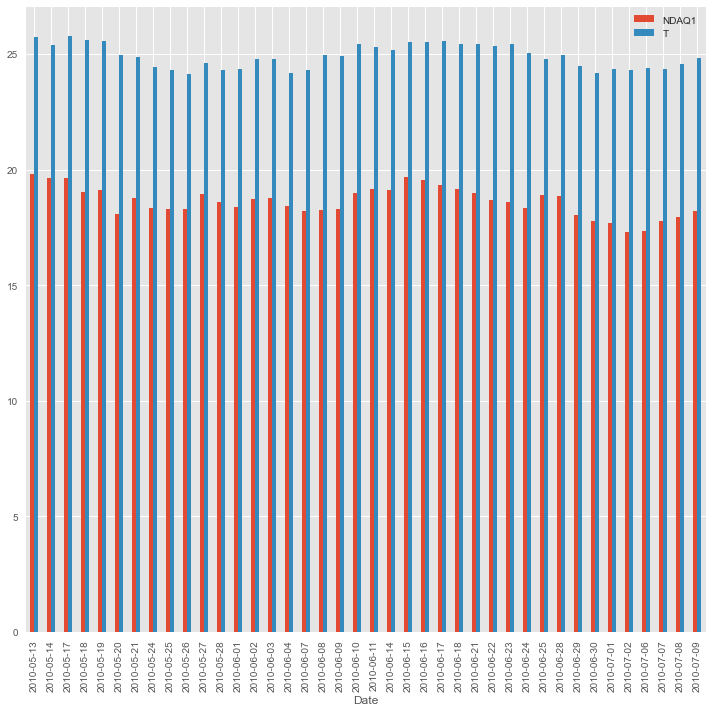

In [1430]:
import matplotlib
breach1_compare.plot.bar()
plt.rcParams['figure.figsize'] = (10, 10)
matplotlib.style.use('ggplot')

<AxesSubplot:xlabel='Date'>

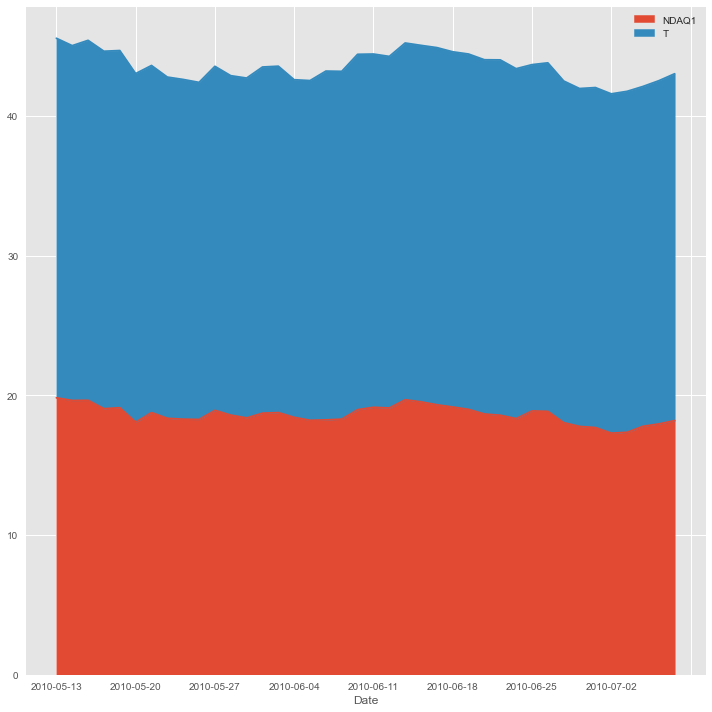

In [1431]:
breach1_compare.plot.area()

In [1433]:
px.line(x=None, y=["NDAQ1","T"], data_frame=breach1_compare, title= "AT&T Stock Data v NASDAQ Stock Data") 